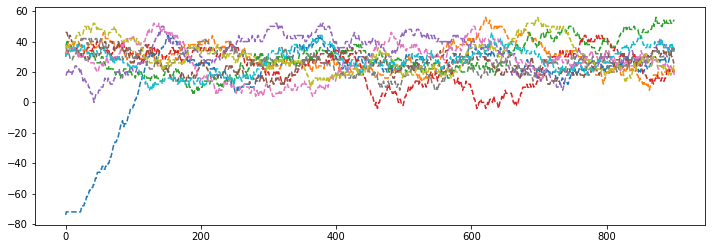

In [77]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import gym
env = gym.make("FrozenLake-v0", is_slippery=True)
alpha=0.1
epsilon=1.0
decay=0.9
gamma=0.95
max_episode=1000
M=10
Q=np.zeros([env.observation_space.n,env.action_space.n])
Q_=np.copy(Q)
end_rewards=np.zeros((max_episode,M))
N=1
#D:(s,a,r,s_)
D=np.zeros((N,4)).astype(int)
plt.figure(figsize=(12,4))
for m in range(M):
    for episode in range(max_episode):
        s=env.reset()
        done=False
        for t in range(100):
            if np.random.rand()<epsilon:
                a=env.action_space.sample()
            else:
                a=np.argmax(Q[s,:])
            s_,reward,done,_=env.step(a)
            if done:#reaching goal or falling into a hole
                r = 1.0 if reward > 0.0 else -1.0
            else:#reaching maximum step
                r = 0.0
    #        Q_[s,a]=(1-alpha)*Q[s,a]+alpha*(r+gamma*np.max(Q_[s_,:]))
            D[np.random.randint(N),:]=[s,a,r,s_]
            for i in range(N):
                s,a,r,s_=D[i,:]
                Q_[s,a]=(1-alpha)*Q[s,a]+alpha*(r+gamma*np.max(Q[s_,:]))
            if t%100==0:
                Q=np.copy(Q_)
            if done:
                break
            s=s_
            epsilon=epsilon*decay
        end_rewards[episode,m]=r
    #plt.plot(np.arange(max_episode),end_rewards[:,m],'.')
    plt.plot(np.convolve(np.ones(100),end_rewards[:,m],"valid"),'-')

# for i in range(100):
#     s=env.reset()
#     a=np.argmax(Q[s,:])
#     s_,r,done,_=env.step(a)
#     env.render()
#     if done:
#         break

In [10]:
D

array([[ 1,  3, -1,  0],
       [ 1,  3,  0,  1]])

In [6]:
Q

array([[ 0.07001986, -0.01865647, -0.01522802, -0.03863245],
       [-0.08499341, -0.1       , -0.1       ,  0.04766248],
       [-0.0984891 , -0.0992322 , -0.1127186 ,  0.01373819],
       [-0.16863899, -0.18821346, -0.19      ,  0.01013143],
       [ 0.07157125, -0.14029668, -0.26115984, -0.2358454 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.17274884, -0.57061008, -0.59417939, -0.59868826],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.22347998, -0.15350896, -0.00712925,  0.15028351],
       [-0.02571125,  0.32876413, -0.10119084, -0.07972307],
       [ 0.40059843, -0.07401955, -0.14919434, -0.1       ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.1       , -0.1       ,  0.50029192, -0.10005625],
       [-0.00081225,  0.64675002,  0.01112397,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

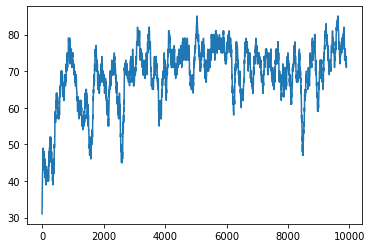

In [151]:
Q= np.zeros((env.observation_space.n, env.action_space.n)) #16x4
alpha=0.1
beta=0.001
gamma=0.95
num_episodes = 1000
reward_list=[]
for i in range(num_episodes):
    s = env.reset();
    done=False
    while done==False:
        if np.random.rand() < beta:
            a = np.random.randint(env.action_space.n)
        else:
            a = np.argmax(Q[s,:] )
        s_next,reward,done,info = env.step(a)
        if done:#reaching goal or falling into a hole
            r = 1.0 if reward > 0.0 else -1.0
        else:#reaching maximum step
            r = 0.0
        Q[s,a]= (1-alpha)*Q[s,a] + alpha*( r + gamma*np.max(Q[s_next,:]) )
        if done == True:
            break
        s=s_next
    reward_list.append(reward)
                                        
plt.plot(np.convolve(np.ones(100),reward_list,"valid"))

In [82]:
s_=env.reset()
for t in range(10000):
    s_,r,done,_=env.step(1)
    print(t,s_,r,done)
    if done:
        pass
        #s_=env.reset()

0 1 0.0 False
1 2 0.0 False
2 6 0.0 False
3 10 0.0 False
4 11 0.0 True
5 11 0 True
6 11 0 True
7 11 0 True
8 11 0 True
9 11 0 True
10 11 0 True
11 11 0 True
12 11 0 True
13 11 0 True
14 11 0 True
15 11 0 True
16 11 0 True
17 11 0 True
18 11 0 True
19 11 0 True
20 11 0 True
21 11 0 True
22 11 0 True
23 11 0 True
24 11 0 True
25 11 0 True
26 11 0 True
27 11 0 True
28 11 0 True
29 11 0 True
30 11 0 True
31 11 0 True
32 11 0 True
33 11 0 True
34 11 0 True
35 11 0 True
36 11 0 True
37 11 0 True
38 11 0 True
39 11 0 True
40 11 0 True
41 11 0 True
42 11 0 True
43 11 0 True
44 11 0 True
45 11 0 True
46 11 0 True
47 11 0 True
48 11 0 True
49 11 0 True
50 11 0 True
51 11 0 True
52 11 0 True
53 11 0 True
54 11 0 True
55 11 0 True
56 11 0 True
57 11 0 True
58 11 0 True
59 11 0 True
60 11 0 True
61 11 0 True
62 11 0 True
63 11 0 True
64 11 0 True
65 11 0 True
66 11 0 True
67 11 0 True
68 11 0 True
69 11 0 True
70 11 0 True
71 11 0 True
72 11 0 True
73 11 0 True
74 11 0 True
75 11 0 True
76 11 0 Tru

927 11 0 True
928 11 0 True
929 11 0 True
930 11 0 True
931 11 0 True
932 11 0 True
933 11 0 True
934 11 0 True
935 11 0 True
936 11 0 True
937 11 0 True
938 11 0 True
939 11 0 True
940 11 0 True
941 11 0 True
942 11 0 True
943 11 0 True
944 11 0 True
945 11 0 True
946 11 0 True
947 11 0 True
948 11 0 True
949 11 0 True
950 11 0 True
951 11 0 True
952 11 0 True
953 11 0 True
954 11 0 True
955 11 0 True
956 11 0 True
957 11 0 True
958 11 0 True
959 11 0 True
960 11 0 True
961 11 0 True
962 11 0 True
963 11 0 True
964 11 0 True
965 11 0 True
966 11 0 True
967 11 0 True
968 11 0 True
969 11 0 True
970 11 0 True
971 11 0 True
972 11 0 True
973 11 0 True
974 11 0 True
975 11 0 True
976 11 0 True
977 11 0 True
978 11 0 True
979 11 0 True
980 11 0 True
981 11 0 True
982 11 0 True
983 11 0 True
984 11 0 True
985 11 0 True
986 11 0 True
987 11 0 True
988 11 0 True
989 11 0 True
990 11 0 True
991 11 0 True
992 11 0 True
993 11 0 True
994 11 0 True
995 11 0 True
996 11 0 True
997 11 0 True
998 11

1840 11 0 True
1841 11 0 True
1842 11 0 True
1843 11 0 True
1844 11 0 True
1845 11 0 True
1846 11 0 True
1847 11 0 True
1848 11 0 True
1849 11 0 True
1850 11 0 True
1851 11 0 True
1852 11 0 True
1853 11 0 True
1854 11 0 True
1855 11 0 True
1856 11 0 True
1857 11 0 True
1858 11 0 True
1859 11 0 True
1860 11 0 True
1861 11 0 True
1862 11 0 True
1863 11 0 True
1864 11 0 True
1865 11 0 True
1866 11 0 True
1867 11 0 True
1868 11 0 True
1869 11 0 True
1870 11 0 True
1871 11 0 True
1872 11 0 True
1873 11 0 True
1874 11 0 True
1875 11 0 True
1876 11 0 True
1877 11 0 True
1878 11 0 True
1879 11 0 True
1880 11 0 True
1881 11 0 True
1882 11 0 True
1883 11 0 True
1884 11 0 True
1885 11 0 True
1886 11 0 True
1887 11 0 True
1888 11 0 True
1889 11 0 True
1890 11 0 True
1891 11 0 True
1892 11 0 True
1893 11 0 True
1894 11 0 True
1895 11 0 True
1896 11 0 True
1897 11 0 True
1898 11 0 True
1899 11 0 True
1900 11 0 True
1901 11 0 True
1902 11 0 True
1903 11 0 True
1904 11 0 True
1905 11 0 True
1906 11 0 

2789 11 0 True
2790 11 0 True
2791 11 0 True
2792 11 0 True
2793 11 0 True
2794 11 0 True
2795 11 0 True
2796 11 0 True
2797 11 0 True
2798 11 0 True
2799 11 0 True
2800 11 0 True
2801 11 0 True
2802 11 0 True
2803 11 0 True
2804 11 0 True
2805 11 0 True
2806 11 0 True
2807 11 0 True
2808 11 0 True
2809 11 0 True
2810 11 0 True
2811 11 0 True
2812 11 0 True
2813 11 0 True
2814 11 0 True
2815 11 0 True
2816 11 0 True
2817 11 0 True
2818 11 0 True
2819 11 0 True
2820 11 0 True
2821 11 0 True
2822 11 0 True
2823 11 0 True
2824 11 0 True
2825 11 0 True
2826 11 0 True
2827 11 0 True
2828 11 0 True
2829 11 0 True
2830 11 0 True
2831 11 0 True
2832 11 0 True
2833 11 0 True
2834 11 0 True
2835 11 0 True
2836 11 0 True
2837 11 0 True
2838 11 0 True
2839 11 0 True
2840 11 0 True
2841 11 0 True
2842 11 0 True
2843 11 0 True
2844 11 0 True
2845 11 0 True
2846 11 0 True
2847 11 0 True
2848 11 0 True
2849 11 0 True
2850 11 0 True
2851 11 0 True
2852 11 0 True
2853 11 0 True
2854 11 0 True
2855 11 0 

3742 11 0 True
3743 11 0 True
3744 11 0 True
3745 11 0 True
3746 11 0 True
3747 11 0 True
3748 11 0 True
3749 11 0 True
3750 11 0 True
3751 11 0 True
3752 11 0 True
3753 11 0 True
3754 11 0 True
3755 11 0 True
3756 11 0 True
3757 11 0 True
3758 11 0 True
3759 11 0 True
3760 11 0 True
3761 11 0 True
3762 11 0 True
3763 11 0 True
3764 11 0 True
3765 11 0 True
3766 11 0 True
3767 11 0 True
3768 11 0 True
3769 11 0 True
3770 11 0 True
3771 11 0 True
3772 11 0 True
3773 11 0 True
3774 11 0 True
3775 11 0 True
3776 11 0 True
3777 11 0 True
3778 11 0 True
3779 11 0 True
3780 11 0 True
3781 11 0 True
3782 11 0 True
3783 11 0 True
3784 11 0 True
3785 11 0 True
3786 11 0 True
3787 11 0 True
3788 11 0 True
3789 11 0 True
3790 11 0 True
3791 11 0 True
3792 11 0 True
3793 11 0 True
3794 11 0 True
3795 11 0 True
3796 11 0 True
3797 11 0 True
3798 11 0 True
3799 11 0 True
3800 11 0 True
3801 11 0 True
3802 11 0 True
3803 11 0 True
3804 11 0 True
3805 11 0 True
3806 11 0 True
3807 11 0 True
3808 11 0 

4695 11 0 True
4696 11 0 True
4697 11 0 True
4698 11 0 True
4699 11 0 True
4700 11 0 True
4701 11 0 True
4702 11 0 True
4703 11 0 True
4704 11 0 True
4705 11 0 True
4706 11 0 True
4707 11 0 True
4708 11 0 True
4709 11 0 True
4710 11 0 True
4711 11 0 True
4712 11 0 True
4713 11 0 True
4714 11 0 True
4715 11 0 True
4716 11 0 True
4717 11 0 True
4718 11 0 True
4719 11 0 True
4720 11 0 True
4721 11 0 True
4722 11 0 True
4723 11 0 True
4724 11 0 True
4725 11 0 True
4726 11 0 True
4727 11 0 True
4728 11 0 True
4729 11 0 True
4730 11 0 True
4731 11 0 True
4732 11 0 True
4733 11 0 True
4734 11 0 True
4735 11 0 True
4736 11 0 True
4737 11 0 True
4738 11 0 True
4739 11 0 True
4740 11 0 True
4741 11 0 True
4742 11 0 True
4743 11 0 True
4744 11 0 True
4745 11 0 True
4746 11 0 True
4747 11 0 True
4748 11 0 True
4749 11 0 True
4750 11 0 True
4751 11 0 True
4752 11 0 True
4753 11 0 True
4754 11 0 True
4755 11 0 True
4756 11 0 True
4757 11 0 True
4758 11 0 True
4759 11 0 True
4760 11 0 True
4761 11 0 

5654 11 0 True
5655 11 0 True
5656 11 0 True
5657 11 0 True
5658 11 0 True
5659 11 0 True
5660 11 0 True
5661 11 0 True
5662 11 0 True
5663 11 0 True
5664 11 0 True
5665 11 0 True
5666 11 0 True
5667 11 0 True
5668 11 0 True
5669 11 0 True
5670 11 0 True
5671 11 0 True
5672 11 0 True
5673 11 0 True
5674 11 0 True
5675 11 0 True
5676 11 0 True
5677 11 0 True
5678 11 0 True
5679 11 0 True
5680 11 0 True
5681 11 0 True
5682 11 0 True
5683 11 0 True
5684 11 0 True
5685 11 0 True
5686 11 0 True
5687 11 0 True
5688 11 0 True
5689 11 0 True
5690 11 0 True
5691 11 0 True
5692 11 0 True
5693 11 0 True
5694 11 0 True
5695 11 0 True
5696 11 0 True
5697 11 0 True
5698 11 0 True
5699 11 0 True
5700 11 0 True
5701 11 0 True
5702 11 0 True
5703 11 0 True
5704 11 0 True
5705 11 0 True
5706 11 0 True
5707 11 0 True
5708 11 0 True
5709 11 0 True
5710 11 0 True
5711 11 0 True
5712 11 0 True
5713 11 0 True
5714 11 0 True
5715 11 0 True
5716 11 0 True
5717 11 0 True
5718 11 0 True
5719 11 0 True
5720 11 0 

6571 11 0 True
6572 11 0 True
6573 11 0 True
6574 11 0 True
6575 11 0 True
6576 11 0 True
6577 11 0 True
6578 11 0 True
6579 11 0 True
6580 11 0 True
6581 11 0 True
6582 11 0 True
6583 11 0 True
6584 11 0 True
6585 11 0 True
6586 11 0 True
6587 11 0 True
6588 11 0 True
6589 11 0 True
6590 11 0 True
6591 11 0 True
6592 11 0 True
6593 11 0 True
6594 11 0 True
6595 11 0 True
6596 11 0 True
6597 11 0 True
6598 11 0 True
6599 11 0 True
6600 11 0 True
6601 11 0 True
6602 11 0 True
6603 11 0 True
6604 11 0 True
6605 11 0 True
6606 11 0 True
6607 11 0 True
6608 11 0 True
6609 11 0 True
6610 11 0 True
6611 11 0 True
6612 11 0 True
6613 11 0 True
6614 11 0 True
6615 11 0 True
6616 11 0 True
6617 11 0 True
6618 11 0 True
6619 11 0 True
6620 11 0 True
6621 11 0 True
6622 11 0 True
6623 11 0 True
6624 11 0 True
6625 11 0 True
6626 11 0 True
6627 11 0 True
6628 11 0 True
6629 11 0 True
6630 11 0 True
6631 11 0 True
6632 11 0 True
6633 11 0 True
6634 11 0 True
6635 11 0 True
6636 11 0 True
6637 11 0 

7484 11 0 True
7485 11 0 True
7486 11 0 True
7487 11 0 True
7488 11 0 True
7489 11 0 True
7490 11 0 True
7491 11 0 True
7492 11 0 True
7493 11 0 True
7494 11 0 True
7495 11 0 True
7496 11 0 True
7497 11 0 True
7498 11 0 True
7499 11 0 True
7500 11 0 True
7501 11 0 True
7502 11 0 True
7503 11 0 True
7504 11 0 True
7505 11 0 True
7506 11 0 True
7507 11 0 True
7508 11 0 True
7509 11 0 True
7510 11 0 True
7511 11 0 True
7512 11 0 True
7513 11 0 True
7514 11 0 True
7515 11 0 True
7516 11 0 True
7517 11 0 True
7518 11 0 True
7519 11 0 True
7520 11 0 True
7521 11 0 True
7522 11 0 True
7523 11 0 True
7524 11 0 True
7525 11 0 True
7526 11 0 True
7527 11 0 True
7528 11 0 True
7529 11 0 True
7530 11 0 True
7531 11 0 True
7532 11 0 True
7533 11 0 True
7534 11 0 True
7535 11 0 True
7536 11 0 True
7537 11 0 True
7538 11 0 True
7539 11 0 True
7540 11 0 True
7541 11 0 True
7542 11 0 True
7543 11 0 True
7544 11 0 True
7545 11 0 True
7546 11 0 True
7547 11 0 True
7548 11 0 True
7549 11 0 True
7550 11 0 

8442 11 0 True
8443 11 0 True
8444 11 0 True
8445 11 0 True
8446 11 0 True
8447 11 0 True
8448 11 0 True
8449 11 0 True
8450 11 0 True
8451 11 0 True
8452 11 0 True
8453 11 0 True
8454 11 0 True
8455 11 0 True
8456 11 0 True
8457 11 0 True
8458 11 0 True
8459 11 0 True
8460 11 0 True
8461 11 0 True
8462 11 0 True
8463 11 0 True
8464 11 0 True
8465 11 0 True
8466 11 0 True
8467 11 0 True
8468 11 0 True
8469 11 0 True
8470 11 0 True
8471 11 0 True
8472 11 0 True
8473 11 0 True
8474 11 0 True
8475 11 0 True
8476 11 0 True
8477 11 0 True
8478 11 0 True
8479 11 0 True
8480 11 0 True
8481 11 0 True
8482 11 0 True
8483 11 0 True
8484 11 0 True
8485 11 0 True
8486 11 0 True
8487 11 0 True
8488 11 0 True
8489 11 0 True
8490 11 0 True
8491 11 0 True
8492 11 0 True
8493 11 0 True
8494 11 0 True
8495 11 0 True
8496 11 0 True
8497 11 0 True
8498 11 0 True
8499 11 0 True
8500 11 0 True
8501 11 0 True
8502 11 0 True
8503 11 0 True
8504 11 0 True
8505 11 0 True
8506 11 0 True
8507 11 0 True
8508 11 0 

9416 11 0 True
9417 11 0 True
9418 11 0 True
9419 11 0 True
9420 11 0 True
9421 11 0 True
9422 11 0 True
9423 11 0 True
9424 11 0 True
9425 11 0 True
9426 11 0 True
9427 11 0 True
9428 11 0 True
9429 11 0 True
9430 11 0 True
9431 11 0 True
9432 11 0 True
9433 11 0 True
9434 11 0 True
9435 11 0 True
9436 11 0 True
9437 11 0 True
9438 11 0 True
9439 11 0 True
9440 11 0 True
9441 11 0 True
9442 11 0 True
9443 11 0 True
9444 11 0 True
9445 11 0 True
9446 11 0 True
9447 11 0 True
9448 11 0 True
9449 11 0 True
9450 11 0 True
9451 11 0 True
9452 11 0 True
9453 11 0 True
9454 11 0 True
9455 11 0 True
9456 11 0 True
9457 11 0 True
9458 11 0 True
9459 11 0 True
9460 11 0 True
9461 11 0 True
9462 11 0 True
9463 11 0 True
9464 11 0 True
9465 11 0 True
9466 11 0 True
9467 11 0 True
9468 11 0 True
9469 11 0 True
9470 11 0 True
9471 11 0 True
9472 11 0 True
9473 11 0 True
9474 11 0 True
9475 11 0 True
9476 11 0 True
9477 11 0 True
9478 11 0 True
9479 11 0 True
9480 11 0 True
9481 11 0 True
9482 11 0 

In [146]:
np.random.randint(1)

0

In [148]:
for i in range(1):
    print(i)

0
